## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

mkdir: cannot create directory ‘/data’: File exists
--2021-06-01 07:08:39--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.83.22
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.83.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  67.4MB/s    in 5.0s    

2021-06-01 07:08:44 (64.3 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Haki

  inflating: /data/test/Andrea_Bocelli_30.jpg  
  inflating: /data/test/Andrea_Bocelli_31.jpg  
  inflating: /data/test/Andy_Roddick_20.jpg  
  inflating: /data/test/Andy_Roddick_21.jpg  
  inflating: /data/test/Andy_Roddick_40.jpg  
  inflating: /data/test/Andy_Roddick_41.jpg  
  inflating: /data/test/Andy_Roddick_50.jpg  
  inflating: /data/test/Andy_Roddick_51.jpg  
  inflating: /data/test/Andy_Rooney_10.jpg  
  inflating: /data/test/Andy_Rooney_11.jpg  
  inflating: /data/test/Andy_Rooney_20.jpg  
  inflating: /data/test/Andy_Rooney_21.jpg  
  inflating: /data/test/Andy_Rooney_50.jpg  
  inflating: /data/test/Andy_Rooney_51.jpg  
  inflating: /data/test/Angel_Lockward_30.jpg  
  inflating: /data/test/Angel_Lockward_31.jpg  
  inflating: /data/test/Angel_Lockward_40.jpg  
  inflating: /data/test/Angel_Lockward_41.jpg  
  inflating: /data/test/Angel_Lockward_50.jpg  
  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/tes

  inflating: /data/test/Catriona_Le_May_Doan_40.jpg  
  inflating: /data/test/Catriona_Le_May_Doan_41.jpg  
  inflating: /data/test/Cecilia_Cheung_00.jpg  
  inflating: /data/test/Cecilia_Cheung_01.jpg  
  inflating: /data/test/Cecilia_Cheung_10.jpg  
  inflating: /data/test/Cecilia_Cheung_11.jpg  
  inflating: /data/test/Cecilia_Cheung_20.jpg  
  inflating: /data/test/Cecilia_Cheung_21.jpg  
  inflating: /data/test/Cecilia_Cheung_50.jpg  
  inflating: /data/test/Cecilia_Cheung_51.jpg  
  inflating: /data/test/Celso_Amorim_10.jpg  
  inflating: /data/test/Celso_Amorim_11.jpg  
  inflating: /data/test/Celso_Amorim_40.jpg  
  inflating: /data/test/Celso_Amorim_41.jpg  
  inflating: /data/test/Celso_Amorim_50.jpg  
  inflating: /data/test/Celso_Amorim_51.jpg  
  inflating: /data/test/Celso_Lafer_00.jpg  
  inflating: /data/test/Celso_Lafer_01.jpg  
  inflating: /data/test/Celso_Lafer_10.jpg  
  inflating: /data/test/Celso_Lafer_11.jpg  
  inflating: /data/test/Celso_Lafer_20.jpg  
  infla

  inflating: /data/test/Conan_OBrien_01.jpg  
  inflating: /data/test/Conan_OBrien_10.jpg  
  inflating: /data/test/Conan_OBrien_11.jpg  
  inflating: /data/test/Conan_OBrien_50.jpg  
  inflating: /data/test/Conan_OBrien_51.jpg  
  inflating: /data/test/Condoleezza_Rice_10.jpg  
  inflating: /data/test/Condoleezza_Rice_11.jpg  
  inflating: /data/test/Condoleezza_Rice_20.jpg  
  inflating: /data/test/Condoleezza_Rice_21.jpg  
  inflating: /data/test/Condoleezza_Rice_30.jpg  
  inflating: /data/test/Condoleezza_Rice_31.jpg  
  inflating: /data/test/Condoleezza_Rice_40.jpg  
  inflating: /data/test/Condoleezza_Rice_41.jpg  
  inflating: /data/test/Connie_Chung_20.jpg  
  inflating: /data/test/Connie_Chung_21.jpg  
  inflating: /data/test/Connie_Chung_30.jpg  
  inflating: /data/test/Connie_Chung_31.jpg  
  inflating: /data/test/Connie_Chung_40.jpg  
  inflating: /data/test/Connie_Chung_41.jpg  
  inflating: /data/test/Connie_Chung_50.jpg  
  inflating: /data/test/Connie_Chung_51.jpg  
  

  inflating: /data/test/Elizabeth_Shue_01.jpg  
  inflating: /data/test/Elizabeth_Shue_20.jpg  
  inflating: /data/test/Elizabeth_Shue_21.jpg  
  inflating: /data/test/Elizabeth_Shue_40.jpg  
  inflating: /data/test/Elizabeth_Shue_41.jpg  
  inflating: /data/test/Ellen_DeGeneres_10.jpg  
  inflating: /data/test/Ellen_DeGeneres_11.jpg  
  inflating: /data/test/Ellen_DeGeneres_40.jpg  
  inflating: /data/test/Ellen_DeGeneres_41.jpg  
  inflating: /data/test/Ellen_DeGeneres_50.jpg  
  inflating: /data/test/Ellen_DeGeneres_51.jpg  
  inflating: /data/test/Elmar_Brok_00.jpg  
  inflating: /data/test/Elmar_Brok_01.jpg  
  inflating: /data/test/Elmar_Brok_20.jpg  
  inflating: /data/test/Elmar_Brok_21.jpg  
  inflating: /data/test/Elmar_Brok_30.jpg  
  inflating: /data/test/Elmar_Brok_31.jpg  
  inflating: /data/test/Elsa_Zylberstein_00.jpg  
  inflating: /data/test/Elsa_Zylberstein_01.jpg  
  inflating: /data/test/Elsa_Zylberstein_10.jpg  
  inflating: /data/test/Elsa_Zylberstein_11.jpg  
  

  inflating: /data/test/Gary_Bettman_40.jpg  
  inflating: /data/test/Gary_Bettman_41.jpg  
  inflating: /data/test/Gary_Coleman_30.jpg  
  inflating: /data/test/Gary_Coleman_31.jpg  
  inflating: /data/test/Gary_Coleman_40.jpg  
  inflating: /data/test/Gary_Coleman_41.jpg  
  inflating: /data/test/Gary_Coleman_50.jpg  
  inflating: /data/test/Gary_Coleman_51.jpg  
  inflating: /data/test/Gary_Condit_00.jpg  
  inflating: /data/test/Gary_Condit_01.jpg  
  inflating: /data/test/Gary_Condit_10.jpg  
  inflating: /data/test/Gary_Condit_11.jpg  
  inflating: /data/test/Gary_Condit_30.jpg  
  inflating: /data/test/Gary_Condit_31.jpg  
  inflating: /data/test/Gene_Hackman_20.jpg  
  inflating: /data/test/Gene_Hackman_21.jpg  
  inflating: /data/test/Gene_Hackman_30.jpg  
  inflating: /data/test/Gene_Hackman_31.jpg  
  inflating: /data/test/Gene_Hackman_40.jpg  
  inflating: /data/test/Gene_Hackman_41.jpg  
  inflating: /data/test/Geoffrey_Rush_00.jpg  
  inflating: /data/test/Geoffrey_Rush_0

  inflating: /data/test/JK_Rowling_31.jpg  
  inflating: /data/test/JK_Rowling_40.jpg  
  inflating: /data/test/JK_Rowling_41.jpg  
  inflating: /data/test/JK_Rowling_50.jpg  
  inflating: /data/test/JK_Rowling_51.jpg  
  inflating: /data/test/Kate_Capshaw_10.jpg  
  inflating: /data/test/Kate_Capshaw_11.jpg  
  inflating: /data/test/Kate_Capshaw_20.jpg  
  inflating: /data/test/Kate_Capshaw_21.jpg  
  inflating: /data/test/Kate_Capshaw_40.jpg  
  inflating: /data/test/Kate_Capshaw_41.jpg  
  inflating: /data/test/Kate_Winslet_00.jpg  
  inflating: /data/test/Kate_Winslet_01.jpg  
  inflating: /data/test/Kate_Winslet_10.jpg  
  inflating: /data/test/Kate_Winslet_11.jpg  
  inflating: /data/test/Kate_Winslet_50.jpg  
  inflating: /data/test/Kate_Winslet_51.jpg  
  inflating: /data/test/Katharine_Hepburn_10.jpg  
  inflating: /data/test/Katharine_Hepburn_11.jpg  
  inflating: /data/test/Katharine_Hepburn_30.jpg  
  inflating: /data/test/Katharine_Hepburn_31.jpg  
  inflating: /data/test/

  inflating: /data/test/Leticia_Van_de_Putte_10.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_11.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_40.jpg  
  inflating: /data/test/Leticia_Van_de_Putte_41.jpg  
  inflating: /data/test/Leuris_Pupo_00.jpg  
  inflating: /data/test/Leuris_Pupo_01.jpg  
  inflating: /data/test/Leuris_Pupo_20.jpg  
  inflating: /data/test/Leuris_Pupo_21.jpg  
  inflating: /data/test/Leuris_Pupo_30.jpg  
  inflating: /data/test/Leuris_Pupo_31.jpg  
  inflating: /data/test/Leuris_Pupo_40.jpg  
  inflating: /data/test/Leuris_Pupo_41.jpg  
  inflating: /data/test/Li_Zhaoxing_00.jpg  
  inflating: /data/test/Li_Zhaoxing_01.jpg  
  inflating: /data/test/Li_Zhaoxing_30.jpg  
  inflating: /data/test/Li_Zhaoxing_31.jpg  
  inflating: /data/test/Li_Zhaoxing_40.jpg  
  inflating: /data/test/Li_Zhaoxing_41.jpg  
  inflating: /data/test/Lincoln_Chafee_20.jpg  
  inflating: /data/test/Lincoln_Chafee_21.jpg  
  inflating: /data/test/Lincoln_Chafee_30.jpg  
  inflatin

  inflating: /data/test/Marc_Shaiman_21.jpg  
  inflating: /data/test/Marc_Shaiman_30.jpg  
  inflating: /data/test/Marc_Shaiman_31.jpg  
  inflating: /data/test/Margaret_Thatcher_10.jpg  
  inflating: /data/test/Margaret_Thatcher_11.jpg  
  inflating: /data/test/Margaret_Thatcher_30.jpg  
  inflating: /data/test/Margaret_Thatcher_31.jpg  
  inflating: /data/test/Margaret_Thatcher_40.jpg  
  inflating: /data/test/Margaret_Thatcher_41.jpg  
  inflating: /data/test/Margaret_Thatcher_50.jpg  
  inflating: /data/test/Margaret_Thatcher_51.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_10.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_11.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_30.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_31.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_40.jpg  
  inflating: /data/test/Maria_Soledad_Alvear_Valenzuela_41.jpg  
  inflating: /data/test/Mariana_Ohata_00.jpg  
  inflating: /dat

  inflating: /data/test/Olene_Walker_40.jpg  
  inflating: /data/test/Olene_Walker_41.jpg  
  inflating: /data/test/Olivia_Newton-John_00.jpg  
  inflating: /data/test/Olivia_Newton-John_01.jpg  
  inflating: /data/test/Olivia_Newton-John_10.jpg  
  inflating: /data/test/Olivia_Newton-John_11.jpg  
  inflating: /data/test/Olivia_Newton-John_40.jpg  
  inflating: /data/test/Olivia_Newton-John_41.jpg  
  inflating: /data/test/Orlando_Bloom_00.jpg  
  inflating: /data/test/Orlando_Bloom_01.jpg  
  inflating: /data/test/Orlando_Bloom_30.jpg  
  inflating: /data/test/Orlando_Bloom_31.jpg  
  inflating: /data/test/Orlando_Bloom_40.jpg  
  inflating: /data/test/Orlando_Bloom_41.jpg  
  inflating: /data/test/Orlando_Bloom_50.jpg  
  inflating: /data/test/Orlando_Bloom_51.jpg  
  inflating: /data/test/Otto_Reich_00.jpg  
  inflating: /data/test/Otto_Reich_01.jpg  
  inflating: /data/test/Otto_Reich_10.jpg  
  inflating: /data/test/Otto_Reich_11.jpg  
  inflating: /data/test/Otto_Reich_30.jpg  


  inflating: /data/test/Richard_Paul_Evans_21.jpg  
  inflating: /data/test/Richard_Paul_Evans_40.jpg  
  inflating: /data/test/Richard_Paul_Evans_41.jpg  
  inflating: /data/test/Richard_Paul_Evans_50.jpg  
  inflating: /data/test/Richard_Paul_Evans_51.jpg  
  inflating: /data/test/Rick_Bragg_20.jpg  
  inflating: /data/test/Rick_Bragg_21.jpg  
  inflating: /data/test/Rick_Bragg_30.jpg  
  inflating: /data/test/Rick_Bragg_31.jpg  
  inflating: /data/test/Rick_Bragg_50.jpg  
  inflating: /data/test/Rick_Bragg_51.jpg  
  inflating: /data/test/Ridley_Scott_10.jpg  
  inflating: /data/test/Ridley_Scott_11.jpg  
  inflating: /data/test/Ridley_Scott_20.jpg  
  inflating: /data/test/Ridley_Scott_21.jpg  
  inflating: /data/test/Ridley_Scott_30.jpg  
  inflating: /data/test/Ridley_Scott_31.jpg  
  inflating: /data/test/Robbie_Coltrane_00.jpg  
  inflating: /data/test/Robbie_Coltrane_01.jpg  
  inflating: /data/test/Robbie_Coltrane_10.jpg  
  inflating: /data/test/Robbie_Coltrane_11.jpg  
  in

  inflating: /data/test/Tom_Harkin_00.jpg  
  inflating: /data/test/Tom_Harkin_01.jpg  
  inflating: /data/test/Tom_Harkin_30.jpg  
  inflating: /data/test/Tom_Harkin_31.jpg  
  inflating: /data/test/Tom_Harkin_40.jpg  
  inflating: /data/test/Tom_Harkin_41.jpg  
  inflating: /data/test/Tom_Osborne_20.jpg  
  inflating: /data/test/Tom_Osborne_21.jpg  
  inflating: /data/test/Tom_Osborne_30.jpg  
  inflating: /data/test/Tom_Osborne_31.jpg  
  inflating: /data/test/Tom_Osborne_50.jpg  
  inflating: /data/test/Tom_Osborne_51.jpg  
  inflating: /data/test/Tom_Ridge_20.jpg  
  inflating: /data/test/Tom_Ridge_21.jpg  
  inflating: /data/test/Tom_Ridge_30.jpg  
  inflating: /data/test/Tom_Ridge_31.jpg  
  inflating: /data/test/Tom_Ridge_50.jpg  
  inflating: /data/test/Tom_Ridge_51.jpg  
  inflating: /data/test/Tom_Sizemore_00.jpg  
  inflating: /data/test/Tom_Sizemore_01.jpg  
  inflating: /data/test/Tom_Sizemore_10.jpg  
  inflating: /data/test/Tom_Sizemore_11.jpg  
  inflating: /data/test/

  inflating: /data/training/Agbani_Darego_41.jpg  
  inflating: /data/training/Agbani_Darego_42.jpg  
  inflating: /data/training/Agbani_Darego_50.jpg  
  inflating: /data/training/Agbani_Darego_51.jpg  
  inflating: /data/training/Agbani_Darego_52.jpg  
  inflating: /data/training/Agnes_Bruckner_00.jpg  
  inflating: /data/training/Agnes_Bruckner_01.jpg  
  inflating: /data/training/Agnes_Bruckner_02.jpg  
  inflating: /data/training/Agnes_Bruckner_10.jpg  
  inflating: /data/training/Agnes_Bruckner_11.jpg  
  inflating: /data/training/Agnes_Bruckner_12.jpg  
  inflating: /data/training/Agnes_Bruckner_20.jpg  
  inflating: /data/training/Agnes_Bruckner_21.jpg  
  inflating: /data/training/Agnes_Bruckner_22.jpg  
  inflating: /data/training/Agnes_Bruckner_40.jpg  
  inflating: /data/training/Agnes_Bruckner_41.jpg  
  inflating: /data/training/Agnes_Bruckner_42.jpg  
  inflating: /data/training/Ahmad_Masood_00.jpg  
  inflating: /data/training/Ahmad_Masood_01.jpg  
  inflating: /data/tr

  inflating: /data/training/Andrea_Bocelli_12.jpg  
  inflating: /data/training/Andrea_Bocelli_20.jpg  
  inflating: /data/training/Andrea_Bocelli_21.jpg  
  inflating: /data/training/Andrea_Bocelli_22.jpg  
  inflating: /data/training/Andrea_Bocelli_30.jpg  
  inflating: /data/training/Andrea_Bocelli_31.jpg  
  inflating: /data/training/Andrea_Bocelli_32.jpg  
  inflating: /data/training/Andy_Roddick_20.jpg  
  inflating: /data/training/Andy_Roddick_21.jpg  
  inflating: /data/training/Andy_Roddick_22.jpg  
  inflating: /data/training/Andy_Roddick_40.jpg  
  inflating: /data/training/Andy_Roddick_41.jpg  
  inflating: /data/training/Andy_Roddick_42.jpg  
  inflating: /data/training/Andy_Roddick_50.jpg  
  inflating: /data/training/Andy_Roddick_51.jpg  
  inflating: /data/training/Andy_Roddick_52.jpg  
  inflating: /data/training/Andy_Rooney_10.jpg  
  inflating: /data/training/Andy_Rooney_11.jpg  
  inflating: /data/training/Andy_Rooney_12.jpg  
  inflating: /data/training/Andy_Rooney

  inflating: /data/training/Bill_Clinton_12.jpg  
  inflating: /data/training/Bill_Clinton_50.jpg  
  inflating: /data/training/Bill_Clinton_51.jpg  
  inflating: /data/training/Bill_Clinton_52.jpg  
  inflating: /data/training/Bill_Frist_00.jpg  
  inflating: /data/training/Bill_Frist_01.jpg  
  inflating: /data/training/Bill_Frist_02.jpg  
  inflating: /data/training/Bill_Frist_10.jpg  
  inflating: /data/training/Bill_Frist_11.jpg  
  inflating: /data/training/Bill_Frist_12.jpg  
  inflating: /data/training/Bill_Frist_20.jpg  
  inflating: /data/training/Bill_Frist_21.jpg  
  inflating: /data/training/Bill_Frist_22.jpg  
  inflating: /data/training/Cameron_Diaz_20.jpg  
  inflating: /data/training/Cameron_Diaz_21.jpg  
  inflating: /data/training/Cameron_Diaz_22.jpg  
  inflating: /data/training/Cameron_Diaz_40.jpg  
  inflating: /data/training/Cameron_Diaz_41.jpg  
  inflating: /data/training/Cameron_Diaz_42.jpg  
  inflating: /data/training/Cameron_Diaz_50.jpg  
  inflating: /data

  inflating: /data/training/Chris_Cirino_22.jpg  
  inflating: /data/training/Chris_Cirino_30.jpg  
  inflating: /data/training/Chris_Cirino_31.jpg  
  inflating: /data/training/Chris_Cirino_32.jpg  
  inflating: /data/training/Chris_Cirino_50.jpg  
  inflating: /data/training/Chris_Cirino_51.jpg  
  inflating: /data/training/Chris_Cirino_52.jpg  
  inflating: /data/training/Chris_Cooper_00.jpg  
  inflating: /data/training/Chris_Cooper_01.jpg  
  inflating: /data/training/Chris_Cooper_02.jpg  
  inflating: /data/training/Chris_Cooper_30.jpg  
  inflating: /data/training/Chris_Cooper_31.jpg  
  inflating: /data/training/Chris_Cooper_32.jpg  
  inflating: /data/training/Chris_Cooper_40.jpg  
  inflating: /data/training/Chris_Cooper_41.jpg  
  inflating: /data/training/Chris_Cooper_42.jpg  
  inflating: /data/training/Chris_Matthews_00.jpg  
  inflating: /data/training/Chris_Matthews_01.jpg  
  inflating: /data/training/Chris_Matthews_02.jpg  
  inflating: /data/training/Chris_Matthews_1

  inflating: /data/training/Condoleezza_Rice_32.jpg  
  inflating: /data/training/Condoleezza_Rice_40.jpg  
  inflating: /data/training/Condoleezza_Rice_41.jpg  
  inflating: /data/training/Condoleezza_Rice_42.jpg  
  inflating: /data/training/Connie_Chung_20.jpg  
  inflating: /data/training/Connie_Chung_21.jpg  
  inflating: /data/training/Connie_Chung_22.jpg  
  inflating: /data/training/Connie_Chung_30.jpg  
  inflating: /data/training/Connie_Chung_31.jpg  
  inflating: /data/training/Connie_Chung_32.jpg  
  inflating: /data/training/Connie_Chung_40.jpg  
  inflating: /data/training/Connie_Chung_41.jpg  
  inflating: /data/training/Connie_Chung_42.jpg  
  inflating: /data/training/Connie_Chung_50.jpg  
  inflating: /data/training/Connie_Chung_51.jpg  
  inflating: /data/training/Connie_Chung_52.jpg  
  inflating: /data/training/Craig_David_10.jpg  
  inflating: /data/training/Craig_David_11.jpg  
  inflating: /data/training/Craig_David_12.jpg  
  inflating: /data/training/Craig_Dav

  inflating: /data/training/Edie_Falco_51.jpg  
  inflating: /data/training/Edie_Falco_52.jpg  
  inflating: /data/training/Eduardo_Duhalde_00.jpg  
  inflating: /data/training/Eduardo_Duhalde_01.jpg  
  inflating: /data/training/Eduardo_Duhalde_02.jpg  
  inflating: /data/training/Eduardo_Duhalde_10.jpg  
  inflating: /data/training/Eduardo_Duhalde_11.jpg  
  inflating: /data/training/Eduardo_Duhalde_12.jpg  
  inflating: /data/training/Eduardo_Duhalde_30.jpg  
  inflating: /data/training/Eduardo_Duhalde_31.jpg  
  inflating: /data/training/Eduardo_Duhalde_32.jpg  
  inflating: /data/training/Edward_Burns_10.jpg  
  inflating: /data/training/Edward_Burns_11.jpg  
  inflating: /data/training/Edward_Burns_12.jpg  
  inflating: /data/training/Edward_Burns_20.jpg  
  inflating: /data/training/Edward_Burns_21.jpg  
  inflating: /data/training/Edward_Burns_22.jpg  
  inflating: /data/training/Edward_Burns_30.jpg  
  inflating: /data/training/Edward_Burns_31.jpg  
  inflating: /data/training

  inflating: /data/training/Erin_Hershey_Presley_12.jpg  
  inflating: /data/training/Erin_Hershey_Presley_30.jpg  
  inflating: /data/training/Erin_Hershey_Presley_31.jpg  
  inflating: /data/training/Erin_Hershey_Presley_32.jpg  
  inflating: /data/training/Erin_Hershey_Presley_40.jpg  
  inflating: /data/training/Erin_Hershey_Presley_41.jpg  
  inflating: /data/training/Erin_Hershey_Presley_42.jpg  
  inflating: /data/training/Ernest_Hollings_00.jpg  
  inflating: /data/training/Ernest_Hollings_01.jpg  
  inflating: /data/training/Ernest_Hollings_02.jpg  
  inflating: /data/training/Ernest_Hollings_10.jpg  
  inflating: /data/training/Ernest_Hollings_11.jpg  
  inflating: /data/training/Ernest_Hollings_12.jpg  
  inflating: /data/training/Ernest_Hollings_20.jpg  
  inflating: /data/training/Ernest_Hollings_21.jpg  
  inflating: /data/training/Ernest_Hollings_22.jpg  
  inflating: /data/training/Ernesto_Zedillo_10.jpg  
  inflating: /data/training/Ernesto_Zedillo_11.jpg  
  inflating

  inflating: /data/training/Gabi_Zimmer_21.jpg  
  inflating: /data/training/Gabi_Zimmer_22.jpg  
  inflating: /data/training/Gabi_Zimmer_50.jpg  
  inflating: /data/training/Gabi_Zimmer_51.jpg  
  inflating: /data/training/Gabi_Zimmer_52.jpg  
  inflating: /data/training/Gary_Bettman_10.jpg  
  inflating: /data/training/Gary_Bettman_11.jpg  
  inflating: /data/training/Gary_Bettman_12.jpg  
  inflating: /data/training/Gary_Bettman_30.jpg  
  inflating: /data/training/Gary_Bettman_31.jpg  
  inflating: /data/training/Gary_Bettman_32.jpg  
  inflating: /data/training/Gary_Bettman_40.jpg  
  inflating: /data/training/Gary_Bettman_41.jpg  
  inflating: /data/training/Gary_Bettman_42.jpg  
  inflating: /data/training/Gary_Coleman_30.jpg  
  inflating: /data/training/Gary_Coleman_31.jpg  
  inflating: /data/training/Gary_Coleman_32.jpg  
  inflating: /data/training/Gary_Coleman_40.jpg  
  inflating: /data/training/Gary_Coleman_41.jpg  
  inflating: /data/training/Gary_Coleman_42.jpg  
  inf

  inflating: /data/training/Jake_Plummer_41.jpg  
  inflating: /data/training/Jake_Plummer_42.jpg  
  inflating: /data/training/Jake_Plummer_50.jpg  
  inflating: /data/training/Jake_Plummer_51.jpg  
  inflating: /data/training/Jake_Plummer_52.jpg  
  inflating: /data/training/James_Carville_00.jpg  
  inflating: /data/training/James_Carville_01.jpg  
  inflating: /data/training/James_Carville_02.jpg  
  inflating: /data/training/James_Carville_10.jpg  
  inflating: /data/training/James_Carville_11.jpg  
  inflating: /data/training/James_Carville_12.jpg  
  inflating: /data/training/James_Carville_30.jpg  
  inflating: /data/training/James_Carville_31.jpg  
  inflating: /data/training/James_Carville_32.jpg  
  inflating: /data/training/James_Carville_50.jpg  
  inflating: /data/training/James_Carville_51.jpg  
  inflating: /data/training/James_Carville_52.jpg  
  inflating: /data/training/James_Cunningham_00.jpg  
  inflating: /data/training/James_Cunningham_01.jpg  
  inflating: /data

  inflating: /data/training/Kemal_Dervis_01.jpg  
  inflating: /data/training/Kemal_Dervis_02.jpg  
  inflating: /data/training/Kemal_Dervis_10.jpg  
  inflating: /data/training/Kemal_Dervis_11.jpg  
  inflating: /data/training/Kemal_Dervis_12.jpg  
  inflating: /data/training/Kemal_Dervis_30.jpg  
  inflating: /data/training/Kemal_Dervis_31.jpg  
  inflating: /data/training/Kemal_Dervis_32.jpg  
  inflating: /data/training/Kevin_Satterfield_00.jpg  
  inflating: /data/training/Kevin_Satterfield_01.jpg  
  inflating: /data/training/Kevin_Satterfield_02.jpg  
  inflating: /data/training/Kevin_Satterfield_10.jpg  
  inflating: /data/training/Kevin_Satterfield_11.jpg  
  inflating: /data/training/Kevin_Satterfield_12.jpg  
  inflating: /data/training/Kevin_Satterfield_20.jpg  
  inflating: /data/training/Kevin_Satterfield_21.jpg  
  inflating: /data/training/Kevin_Satterfield_22.jpg  
  inflating: /data/training/Kieran_Culkin_00.jpg  
  inflating: /data/training/Kieran_Culkin_01.jpg  
  i

  inflating: /data/training/Lee_Baca_41.jpg  
  inflating: /data/training/Lee_Baca_42.jpg  
  inflating: /data/training/Lene_Espersen_10.jpg  
  inflating: /data/training/Lene_Espersen_11.jpg  
  inflating: /data/training/Lene_Espersen_12.jpg  
  inflating: /data/training/Lene_Espersen_20.jpg  
  inflating: /data/training/Lene_Espersen_21.jpg  
  inflating: /data/training/Lene_Espersen_22.jpg  
  inflating: /data/training/Lene_Espersen_40.jpg  
  inflating: /data/training/Lene_Espersen_41.jpg  
  inflating: /data/training/Lene_Espersen_42.jpg  
  inflating: /data/training/Lesia_Burlak_00.jpg  
  inflating: /data/training/Lesia_Burlak_01.jpg  
  inflating: /data/training/Lesia_Burlak_02.jpg  
  inflating: /data/training/Lesia_Burlak_20.jpg  
  inflating: /data/training/Lesia_Burlak_21.jpg  
  inflating: /data/training/Lesia_Burlak_22.jpg  
  inflating: /data/training/Lesia_Burlak_30.jpg  
  inflating: /data/training/Lesia_Burlak_31.jpg  
  inflating: /data/training/Lesia_Burlak_32.jpg  

  inflating: /data/training/Lucia_Kenny_Anthony_11.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_12.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_40.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_41.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_42.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_50.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_51.jpg  
  inflating: /data/training/Lucia_Kenny_Anthony_52.jpg  
  inflating: /data/training/Lucio_Stanca_00.jpg  
  inflating: /data/training/Lucio_Stanca_01.jpg  
  inflating: /data/training/Lucio_Stanca_02.jpg  
  inflating: /data/training/Lucio_Stanca_20.jpg  
  inflating: /data/training/Lucio_Stanca_21.jpg  
  inflating: /data/training/Lucio_Stanca_22.jpg  
  inflating: /data/training/Lucio_Stanca_30.jpg  
  inflating: /data/training/Lucio_Stanca_31.jpg  
  inflating: /data/training/Lucio_Stanca_32.jpg  
  inflating: /data/training/Lucio_Stanca_40.jpg  
  inflating: /data/training/Lucio_Stanca_41.

  inflating: /data/training/Marina_Silva_52.jpg  
  inflating: /data/training/Mario_Kreutzberger_20.jpg  
  inflating: /data/training/Mario_Kreutzberger_21.jpg  
  inflating: /data/training/Mario_Kreutzberger_22.jpg  
  inflating: /data/training/Mario_Kreutzberger_30.jpg  
  inflating: /data/training/Mario_Kreutzberger_31.jpg  
  inflating: /data/training/Mario_Kreutzberger_32.jpg  
  inflating: /data/training/Mario_Kreutzberger_40.jpg  
  inflating: /data/training/Mario_Kreutzberger_41.jpg  
  inflating: /data/training/Mario_Kreutzberger_42.jpg  
  inflating: /data/training/Marisa_Tomei_10.jpg  
  inflating: /data/training/Marisa_Tomei_11.jpg  
  inflating: /data/training/Marisa_Tomei_12.jpg  
  inflating: /data/training/Marisa_Tomei_20.jpg  
  inflating: /data/training/Marisa_Tomei_21.jpg  
  inflating: /data/training/Marisa_Tomei_22.jpg  
  inflating: /data/training/Marisa_Tomei_40.jpg  
  inflating: /data/training/Marisa_Tomei_41.jpg  
  inflating: /data/training/Marisa_Tomei_42.jp

  inflating: /data/training/Norman_Mineta_52.jpg  
  inflating: /data/training/Olene_Walker_00.jpg  
  inflating: /data/training/Olene_Walker_01.jpg  
  inflating: /data/training/Olene_Walker_02.jpg  
  inflating: /data/training/Olene_Walker_10.jpg  
  inflating: /data/training/Olene_Walker_11.jpg  
  inflating: /data/training/Olene_Walker_12.jpg  
  inflating: /data/training/Olene_Walker_30.jpg  
  inflating: /data/training/Olene_Walker_31.jpg  
  inflating: /data/training/Olene_Walker_32.jpg  
  inflating: /data/training/Olene_Walker_40.jpg  
  inflating: /data/training/Olene_Walker_41.jpg  
  inflating: /data/training/Olene_Walker_42.jpg  
  inflating: /data/training/Olivia_Newton-John_00.jpg  
  inflating: /data/training/Olivia_Newton-John_01.jpg  
  inflating: /data/training/Olivia_Newton-John_02.jpg  
  inflating: /data/training/Olivia_Newton-John_10.jpg  
  inflating: /data/training/Olivia_Newton-John_11.jpg  
  inflating: /data/training/Olivia_Newton-John_12.jpg  
  inflating: 

  inflating: /data/training/Queen_Noor_30.jpg  
  inflating: /data/training/Queen_Noor_31.jpg  
  inflating: /data/training/Queen_Noor_32.jpg  
  inflating: /data/training/Queen_Noor_50.jpg  
  inflating: /data/training/Queen_Noor_51.jpg  
  inflating: /data/training/Queen_Noor_52.jpg  
  inflating: /data/training/Queen_Rania_10.jpg  
  inflating: /data/training/Queen_Rania_11.jpg  
  inflating: /data/training/Queen_Rania_12.jpg  
  inflating: /data/training/Queen_Rania_30.jpg  
  inflating: /data/training/Queen_Rania_31.jpg  
  inflating: /data/training/Queen_Rania_32.jpg  
  inflating: /data/training/Queen_Rania_50.jpg  
  inflating: /data/training/Queen_Rania_51.jpg  
  inflating: /data/training/Queen_Rania_52.jpg  
  inflating: /data/training/Rachel_Hunter_30.jpg  
  inflating: /data/training/Rachel_Hunter_31.jpg  
  inflating: /data/training/Rachel_Hunter_32.jpg  
  inflating: /data/training/Rachel_Hunter_40.jpg  
  inflating: /data/training/Rachel_Hunter_41.jpg  
  inflating: /da

  inflating: /data/training/Saeed_Mortazavi_22.jpg  
  inflating: /data/training/Saeed_Mortazavi_50.jpg  
  inflating: /data/training/Saeed_Mortazavi_51.jpg  
  inflating: /data/training/Saeed_Mortazavi_52.jpg  
  inflating: /data/training/Sally_Ride_00.jpg  
  inflating: /data/training/Sally_Ride_01.jpg  
  inflating: /data/training/Sally_Ride_02.jpg  
  inflating: /data/training/Sally_Ride_40.jpg  
  inflating: /data/training/Sally_Ride_41.jpg  
  inflating: /data/training/Sally_Ride_42.jpg  
  inflating: /data/training/Sally_Ride_50.jpg  
  inflating: /data/training/Sally_Ride_51.jpg  
  inflating: /data/training/Sally_Ride_52.jpg  
  inflating: /data/training/Sanjay_Gupta_10.jpg  
  inflating: /data/training/Sanjay_Gupta_11.jpg  
  inflating: /data/training/Sanjay_Gupta_12.jpg  
  inflating: /data/training/Sanjay_Gupta_20.jpg  
  inflating: /data/training/Sanjay_Gupta_21.jpg  
  inflating: /data/training/Sanjay_Gupta_22.jpg  
  inflating: /data/training/Sanjay_Gupta_40.jpg  
  infl

  inflating: /data/training/Tom_Coughlin_50.jpg  
  inflating: /data/training/Tom_Coughlin_51.jpg  
  inflating: /data/training/Tom_Coughlin_52.jpg  
  inflating: /data/training/Tom_Hanks_30.jpg  
  inflating: /data/training/Tom_Hanks_31.jpg  
  inflating: /data/training/Tom_Hanks_32.jpg  
  inflating: /data/training/Tom_Hanks_40.jpg  
  inflating: /data/training/Tom_Hanks_41.jpg  
  inflating: /data/training/Tom_Hanks_42.jpg  
  inflating: /data/training/Tom_Hanks_50.jpg  
  inflating: /data/training/Tom_Hanks_51.jpg  
  inflating: /data/training/Tom_Hanks_52.jpg  
  inflating: /data/training/Tom_Harkin_00.jpg  
  inflating: /data/training/Tom_Harkin_01.jpg  
  inflating: /data/training/Tom_Harkin_02.jpg  
  inflating: /data/training/Tom_Harkin_30.jpg  
  inflating: /data/training/Tom_Harkin_31.jpg  
  inflating: /data/training/Tom_Harkin_32.jpg  
  inflating: /data/training/Tom_Harkin_40.jpg  
  inflating: /data/training/Tom_Harkin_41.jpg  
  inflating: /data/training/Tom_Harkin_42.j

  inflating: /data/training/Zhang_Ziyi_10.jpg  
  inflating: /data/training/Zhang_Ziyi_11.jpg  
  inflating: /data/training/Zhang_Ziyi_12.jpg  
  inflating: /data/training/Zhang_Ziyi_20.jpg  
  inflating: /data/training/Zhang_Ziyi_21.jpg  
  inflating: /data/training/Zhang_Ziyi_22.jpg  
  inflating: /data/training/Zhang_Ziyi_40.jpg  
  inflating: /data/training/Zhang_Ziyi_41.jpg  
  inflating: /data/training/Zhang_Ziyi_42.jpg  
  inflating: /data/training/Zhong_Nanshan_00.jpg  
  inflating: /data/training/Zhong_Nanshan_01.jpg  
  inflating: /data/training/Zhong_Nanshan_02.jpg  
  inflating: /data/training/Zhong_Nanshan_10.jpg  
  inflating: /data/training/Zhong_Nanshan_11.jpg  
  inflating: /data/training/Zhong_Nanshan_12.jpg  
  inflating: /data/training/Zhong_Nanshan_50.jpg  
  inflating: /data/training/Zhong_Nanshan_51.jpg  
  inflating: /data/training/Zhong_Nanshan_52.jpg  
  inflating: /data/training_frames_keypoints.csv  


<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [4]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net().to(device)
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25088, out_features=2048, bias=True)
  (drop_fc1): Dropout(p=0.2)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (drop_fc2): Dropo

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [5]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(250),
                                     RandomCrop(224),
                                     Normalize(),
                                     ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [6]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [7]:
# load training data in batches
batch_size = 32

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=1)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [8]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [9]:
# load test data in batches
batch_size = 32

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=1)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [10]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        # Pushing to GPU if necessary
        images = images.type(torch.FloatTensor).to(device)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [11]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([32, 1, 224, 224])
torch.Size([32, 68, 2])
torch.Size([32, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [12]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

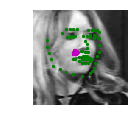

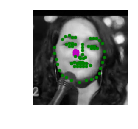

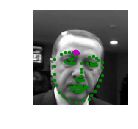

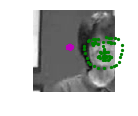

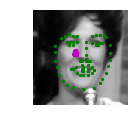

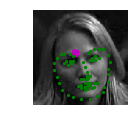

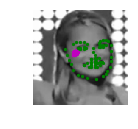

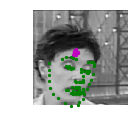

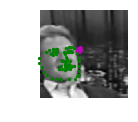

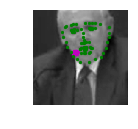

In [13]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        
        if device == 'cuda':
            image = image.cpu()
        
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        
        if device == 'cuda':
            predicted_key_pts = predicted_key_pts.cpu()
            
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [14]:
## TODO: Define the loss and optimization
import torch.optim as optim

def RMSELoss(yhat, y):
    return torch.sqrt(torch.mean((yhat-y)**2))

# criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss()
# criterion = RMSELoss

optimizer = optim.Adam(net.parameters(), lr = 0.001)

## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [15]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()
    
    training_loss = []

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor).to(device)
            images = images.type(torch.FloatTensor).to(device)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                training_loss.append(running_loss / 10)
                running_loss = 0.0

    print('Finished Training')
    
    return training_loss


In [16]:
# train your network
n_epochs = 35 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    training_loss = train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.25341801047325135
Epoch: 1, Batch: 20, Avg. Loss: 0.11798113733530044
Epoch: 1, Batch: 30, Avg. Loss: 0.09600238874554634
Epoch: 1, Batch: 40, Avg. Loss: 0.09718026295304298
Epoch: 1, Batch: 50, Avg. Loss: 0.10123396664857864
Epoch: 1, Batch: 60, Avg. Loss: 0.09873859807848931
Epoch: 1, Batch: 70, Avg. Loss: 0.11108745262026787
Epoch: 1, Batch: 80, Avg. Loss: 0.10324579402804375
Epoch: 1, Batch: 90, Avg. Loss: 0.10404749736189842
Epoch: 1, Batch: 100, Avg. Loss: 0.09776190593838692


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.08483218997716904
Epoch: 2, Batch: 20, Avg. Loss: 0.09725385308265685
Epoch: 2, Batch: 30, Avg. Loss: 0.09368674531579017
Epoch: 2, Batch: 40, Avg. Loss: 0.09047830179333687
Epoch: 2, Batch: 50, Avg. Loss: 0.09646850004792214
Epoch: 2, Batch: 60, Avg. Loss: 0.09027094766497612
Epoch: 2, Batch: 70, Avg. Loss: 0.09151677563786506
Epoch: 2, Batch: 80, Avg. Loss: 0.08674867078661919
Epoch: 2, Batch: 90, Avg. Loss: 0.0984375536441803
Epoch: 2, Batch: 100, Avg. Loss: 0.08604645282030106


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.08815631717443466
Epoch: 3, Batch: 20, Avg. Loss: 0.08478635922074318
Epoch: 3, Batch: 30, Avg. Loss: 0.08921755850315094
Epoch: 3, Batch: 40, Avg. Loss: 0.08965708911418915
Epoch: 3, Batch: 50, Avg. Loss: 0.09392103254795074
Epoch: 3, Batch: 60, Avg. Loss: 0.09313556477427483
Epoch: 3, Batch: 70, Avg. Loss: 0.07600586228072644
Epoch: 3, Batch: 80, Avg. Loss: 0.07350329607725144
Epoch: 3, Batch: 90, Avg. Loss: 0.07211297191679478
Epoch: 3, Batch: 100, Avg. Loss: 0.08099353909492493


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.0759612761437893
Epoch: 4, Batch: 20, Avg. Loss: 0.07332565262913704
Epoch: 4, Batch: 30, Avg. Loss: 0.07477692291140556
Epoch: 4, Batch: 40, Avg. Loss: 0.06424138359725476
Epoch: 4, Batch: 50, Avg. Loss: 0.06294909641146659
Epoch: 4, Batch: 60, Avg. Loss: 0.0742057677358389
Epoch: 4, Batch: 70, Avg. Loss: 0.0631534919142723
Epoch: 4, Batch: 80, Avg. Loss: 0.05906631760299206
Epoch: 4, Batch: 90, Avg. Loss: 0.058756376057863234
Epoch: 4, Batch: 100, Avg. Loss: 0.0677461214363575


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.06788500100374222
Epoch: 5, Batch: 20, Avg. Loss: 0.06452328003942967
Epoch: 5, Batch: 30, Avg. Loss: 0.05798239856958389
Epoch: 5, Batch: 40, Avg. Loss: 0.0602588452398777
Epoch: 5, Batch: 50, Avg. Loss: 0.051866752281785014
Epoch: 5, Batch: 60, Avg. Loss: 0.04723143000155687
Epoch: 5, Batch: 70, Avg. Loss: 0.04987242706120014
Epoch: 5, Batch: 80, Avg. Loss: 0.051181352511048314
Epoch: 5, Batch: 90, Avg. Loss: 0.049538487941026686
Epoch: 5, Batch: 100, Avg. Loss: 0.04894758425652981


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.04480517879128456
Epoch: 6, Batch: 20, Avg. Loss: 0.04184844139963388
Epoch: 6, Batch: 30, Avg. Loss: 0.05270974822342396
Epoch: 6, Batch: 40, Avg. Loss: 0.04354593921452761
Epoch: 6, Batch: 50, Avg. Loss: 0.050335693173110485
Epoch: 6, Batch: 60, Avg. Loss: 0.04292328488081694
Epoch: 6, Batch: 70, Avg. Loss: 0.039409264549613
Epoch: 6, Batch: 80, Avg. Loss: 0.039145300164818764
Epoch: 6, Batch: 90, Avg. Loss: 0.03885388970375061
Epoch: 6, Batch: 100, Avg. Loss: 0.038879174180328845


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.029928817600011825
Epoch: 7, Batch: 20, Avg. Loss: 0.03468603566288948
Epoch: 7, Batch: 30, Avg. Loss: 0.03702818490564823
Epoch: 7, Batch: 40, Avg. Loss: 0.03692689780145884
Epoch: 7, Batch: 50, Avg. Loss: 0.040266864374279975
Epoch: 7, Batch: 60, Avg. Loss: 0.029660259932279588
Epoch: 7, Batch: 70, Avg. Loss: 0.03868821691721678
Epoch: 7, Batch: 80, Avg. Loss: 0.036693936586380003
Epoch: 7, Batch: 90, Avg. Loss: 0.03299582377076149
Epoch: 7, Batch: 100, Avg. Loss: 0.03628797065466642


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.031204749830067158
Epoch: 8, Batch: 20, Avg. Loss: 0.025631486810743807
Epoch: 8, Batch: 30, Avg. Loss: 0.03193232472985983
Epoch: 8, Batch: 40, Avg. Loss: 0.031033361330628395
Epoch: 8, Batch: 50, Avg. Loss: 0.03265566099435091
Epoch: 8, Batch: 60, Avg. Loss: 0.03157526217401028
Epoch: 8, Batch: 70, Avg. Loss: 0.030942334048449992
Epoch: 8, Batch: 80, Avg. Loss: 0.02720591276884079
Epoch: 8, Batch: 90, Avg. Loss: 0.027131148241460325
Epoch: 8, Batch: 100, Avg. Loss: 0.02958696214482188


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.028260566480457782
Epoch: 9, Batch: 20, Avg. Loss: 0.032779589854180814
Epoch: 9, Batch: 30, Avg. Loss: 0.027527225948870183
Epoch: 9, Batch: 40, Avg. Loss: 0.021628564316779376
Epoch: 9, Batch: 50, Avg. Loss: 0.02665941435843706
Epoch: 9, Batch: 60, Avg. Loss: 0.025567123480141164
Epoch: 9, Batch: 70, Avg. Loss: 0.026549279876053333
Epoch: 9, Batch: 80, Avg. Loss: 0.01958928760141134
Epoch: 9, Batch: 90, Avg. Loss: 0.023640880919992925
Epoch: 9, Batch: 100, Avg. Loss: 0.022157030925154687


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.02788618579506874
Epoch: 10, Batch: 20, Avg. Loss: 0.029270088858902456
Epoch: 10, Batch: 30, Avg. Loss: 0.035890115145593884
Epoch: 10, Batch: 40, Avg. Loss: 0.02055012797936797
Epoch: 10, Batch: 50, Avg. Loss: 0.021422128286212684
Epoch: 10, Batch: 60, Avg. Loss: 0.02972963862121105
Epoch: 10, Batch: 70, Avg. Loss: 0.02139293821528554
Epoch: 10, Batch: 80, Avg. Loss: 0.020332752913236617
Epoch: 10, Batch: 90, Avg. Loss: 0.022964829951524733
Epoch: 10, Batch: 100, Avg. Loss: 0.017497342824935914


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.01883582603186369
Epoch: 11, Batch: 20, Avg. Loss: 0.019379720836877824
Epoch: 11, Batch: 30, Avg. Loss: 0.03614537818357348
Epoch: 11, Batch: 40, Avg. Loss: 0.022240288183093072
Epoch: 11, Batch: 50, Avg. Loss: 0.024638456664979456
Epoch: 11, Batch: 60, Avg. Loss: 0.018462495040148498
Epoch: 11, Batch: 70, Avg. Loss: 0.017553444113582374
Epoch: 11, Batch: 80, Avg. Loss: 0.016142260935157537
Epoch: 11, Batch: 90, Avg. Loss: 0.022727987542748452
Epoch: 11, Batch: 100, Avg. Loss: 0.016909834835678338


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.01460601007565856
Epoch: 12, Batch: 20, Avg. Loss: 0.017670562583953144
Epoch: 12, Batch: 30, Avg. Loss: 0.015016409289091825
Epoch: 12, Batch: 40, Avg. Loss: 0.014265911094844342
Epoch: 12, Batch: 50, Avg. Loss: 0.016476514097303153
Epoch: 12, Batch: 60, Avg. Loss: 0.020160756912082432
Epoch: 12, Batch: 70, Avg. Loss: 0.015580833051353693
Epoch: 12, Batch: 80, Avg. Loss: 0.020368328038603067
Epoch: 12, Batch: 90, Avg. Loss: 0.0152585718780756
Epoch: 12, Batch: 100, Avg. Loss: 0.014152910746634006


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.016925644781440496
Epoch: 13, Batch: 20, Avg. Loss: 0.02142641805112362
Epoch: 13, Batch: 30, Avg. Loss: 0.014217640738934278
Epoch: 13, Batch: 40, Avg. Loss: 0.014683141838759184
Epoch: 13, Batch: 50, Avg. Loss: 0.019021350797265767
Epoch: 13, Batch: 60, Avg. Loss: 0.02108105579391122
Epoch: 13, Batch: 70, Avg. Loss: 0.018653419241309165
Epoch: 13, Batch: 80, Avg. Loss: 0.015450587030500174
Epoch: 13, Batch: 90, Avg. Loss: 0.014383006002753973
Epoch: 13, Batch: 100, Avg. Loss: 0.02043974958360195


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.013388121221214532
Epoch: 14, Batch: 20, Avg. Loss: 0.012935949210077523
Epoch: 14, Batch: 30, Avg. Loss: 0.01400059713050723
Epoch: 14, Batch: 40, Avg. Loss: 0.016027734521776436
Epoch: 14, Batch: 50, Avg. Loss: 0.014724039658904075
Epoch: 14, Batch: 60, Avg. Loss: 0.01641806149855256
Epoch: 14, Batch: 70, Avg. Loss: 0.0255795038305223
Epoch: 14, Batch: 80, Avg. Loss: 0.018552339635789394
Epoch: 14, Batch: 90, Avg. Loss: 0.014626038447022437
Epoch: 14, Batch: 100, Avg. Loss: 0.016542190685868263


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.02459463234990835
Epoch: 15, Batch: 20, Avg. Loss: 0.017079159244894983
Epoch: 15, Batch: 30, Avg. Loss: 0.01771471295505762
Epoch: 15, Batch: 40, Avg. Loss: 0.014358058664947748
Epoch: 15, Batch: 50, Avg. Loss: 0.01613243790343404
Epoch: 15, Batch: 60, Avg. Loss: 0.013891467824578285
Epoch: 15, Batch: 70, Avg. Loss: 0.01375151090323925
Epoch: 15, Batch: 80, Avg. Loss: 0.01749223507940769
Epoch: 15, Batch: 90, Avg. Loss: 0.01576573820784688
Epoch: 15, Batch: 100, Avg. Loss: 0.012332145497202874


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.01625683605670929
Epoch: 16, Batch: 20, Avg. Loss: 0.017207723995670676
Epoch: 16, Batch: 30, Avg. Loss: 0.01195873785763979
Epoch: 16, Batch: 40, Avg. Loss: 0.010698675643652678
Epoch: 16, Batch: 50, Avg. Loss: 0.010927795059978962
Epoch: 16, Batch: 60, Avg. Loss: 0.017724480014294386
Epoch: 16, Batch: 70, Avg. Loss: 0.012643709406256675
Epoch: 16, Batch: 80, Avg. Loss: 0.01644112914800644
Epoch: 16, Batch: 90, Avg. Loss: 0.01926269121468067
Epoch: 16, Batch: 100, Avg. Loss: 0.012226062640547753


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.013758329395204782
Epoch: 17, Batch: 20, Avg. Loss: 0.01626342642121017
Epoch: 17, Batch: 30, Avg. Loss: 0.0179293280467391
Epoch: 17, Batch: 40, Avg. Loss: 0.012052260804921389
Epoch: 17, Batch: 50, Avg. Loss: 0.011346062924712897
Epoch: 17, Batch: 60, Avg. Loss: 0.016349469777196646
Epoch: 17, Batch: 70, Avg. Loss: 0.012601350946351886
Epoch: 17, Batch: 80, Avg. Loss: 0.011478772666305304
Epoch: 17, Batch: 90, Avg. Loss: 0.010875882534310221
Epoch: 17, Batch: 100, Avg. Loss: 0.014664909336715937


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.00909180655144155
Epoch: 18, Batch: 20, Avg. Loss: 0.017114639328792692
Epoch: 18, Batch: 30, Avg. Loss: 0.010582279413938522
Epoch: 18, Batch: 40, Avg. Loss: 0.009229712886735797
Epoch: 18, Batch: 50, Avg. Loss: 0.008894577855244279
Epoch: 18, Batch: 60, Avg. Loss: 0.010642991168424487
Epoch: 18, Batch: 70, Avg. Loss: 0.013086357340216636
Epoch: 18, Batch: 80, Avg. Loss: 0.009977519745007157
Epoch: 18, Batch: 90, Avg. Loss: 0.009769619861617684
Epoch: 18, Batch: 100, Avg. Loss: 0.011247299704700708


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.009249301115050911
Epoch: 19, Batch: 20, Avg. Loss: 0.009717990504577756
Epoch: 19, Batch: 30, Avg. Loss: 0.00972457923926413
Epoch: 19, Batch: 40, Avg. Loss: 0.010513948975130916
Epoch: 19, Batch: 50, Avg. Loss: 0.014121170388534665
Epoch: 19, Batch: 60, Avg. Loss: 0.011193637177348137
Epoch: 19, Batch: 70, Avg. Loss: 0.009823600202798844
Epoch: 19, Batch: 80, Avg. Loss: 0.010528858983889222
Epoch: 19, Batch: 90, Avg. Loss: 0.00993198761716485
Epoch: 19, Batch: 100, Avg. Loss: 0.010666147153824568


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.010259837983176113
Epoch: 20, Batch: 20, Avg. Loss: 0.01176123321056366
Epoch: 20, Batch: 30, Avg. Loss: 0.01536739943549037
Epoch: 20, Batch: 40, Avg. Loss: 0.011031727213412524
Epoch: 20, Batch: 50, Avg. Loss: 0.009738290123641491
Epoch: 20, Batch: 60, Avg. Loss: 0.014848786406219006
Epoch: 20, Batch: 70, Avg. Loss: 0.010512059787288308
Epoch: 20, Batch: 80, Avg. Loss: 0.011784932482987643
Epoch: 20, Batch: 90, Avg. Loss: 0.011506761191412807
Epoch: 20, Batch: 100, Avg. Loss: 0.013069933652877808


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 21, Batch: 10, Avg. Loss: 0.015193905681371689
Epoch: 21, Batch: 20, Avg. Loss: 0.011392291961237788
Epoch: 21, Batch: 30, Avg. Loss: 0.013848732877522706
Epoch: 21, Batch: 40, Avg. Loss: 0.010406633419916034
Epoch: 21, Batch: 50, Avg. Loss: 0.014009152725338935
Epoch: 21, Batch: 60, Avg. Loss: 0.008778248028829694
Epoch: 21, Batch: 70, Avg. Loss: 0.008294095797464252
Epoch: 21, Batch: 80, Avg. Loss: 0.009725950146093964
Epoch: 21, Batch: 90, Avg. Loss: 0.009109756676480174
Epoch: 21, Batch: 100, Avg. Loss: 0.011184682603925467


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 22, Batch: 10, Avg. Loss: 0.009065615199506282
Epoch: 22, Batch: 20, Avg. Loss: 0.014336778689175845
Epoch: 22, Batch: 30, Avg. Loss: 0.007695801975205541
Epoch: 22, Batch: 40, Avg. Loss: 0.008700687810778618
Epoch: 22, Batch: 50, Avg. Loss: 0.009016470611095428
Epoch: 22, Batch: 60, Avg. Loss: 0.012844707909971475
Epoch: 22, Batch: 70, Avg. Loss: 0.009429775364696979
Epoch: 22, Batch: 80, Avg. Loss: 0.014832272194325924
Epoch: 22, Batch: 90, Avg. Loss: 0.008576799556612969
Epoch: 22, Batch: 100, Avg. Loss: 0.009503799816593527


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 23, Batch: 10, Avg. Loss: 0.009988287556916475
Epoch: 23, Batch: 20, Avg. Loss: 0.011999704129993915
Epoch: 23, Batch: 30, Avg. Loss: 0.009934213105589151
Epoch: 23, Batch: 40, Avg. Loss: 0.00914201745763421
Epoch: 23, Batch: 50, Avg. Loss: 0.007910032104700804
Epoch: 23, Batch: 60, Avg. Loss: 0.008588700741529464
Epoch: 23, Batch: 70, Avg. Loss: 0.007874889764934778
Epoch: 23, Batch: 80, Avg. Loss: 0.01524421786889434
Epoch: 23, Batch: 90, Avg. Loss: 0.007248790748417377
Epoch: 23, Batch: 100, Avg. Loss: 0.008196931798011065


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 24, Batch: 10, Avg. Loss: 0.007561385584995151
Epoch: 24, Batch: 20, Avg. Loss: 0.008373687416315079
Epoch: 24, Batch: 30, Avg. Loss: 0.013093696907162666
Epoch: 24, Batch: 40, Avg. Loss: 0.013251573126763106
Epoch: 24, Batch: 50, Avg. Loss: 0.015600084559991956
Epoch: 24, Batch: 60, Avg. Loss: 0.00960483835078776
Epoch: 24, Batch: 70, Avg. Loss: 0.009006529022008181
Epoch: 24, Batch: 80, Avg. Loss: 0.013391381269320846
Epoch: 24, Batch: 90, Avg. Loss: 0.01001086044125259
Epoch: 24, Batch: 100, Avg. Loss: 0.00993214058689773


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 25, Batch: 10, Avg. Loss: 0.009354845341295003
Epoch: 25, Batch: 20, Avg. Loss: 0.011342921573668719
Epoch: 25, Batch: 30, Avg. Loss: 0.009272308787330985
Epoch: 25, Batch: 40, Avg. Loss: 0.007823019567877055
Epoch: 25, Batch: 50, Avg. Loss: 0.010552175901830196
Epoch: 25, Batch: 60, Avg. Loss: 0.013445182796567678
Epoch: 25, Batch: 70, Avg. Loss: 0.01011191913858056
Epoch: 25, Batch: 80, Avg. Loss: 0.008618039125576616
Epoch: 25, Batch: 90, Avg. Loss: 0.009894898300990463
Epoch: 25, Batch: 100, Avg. Loss: 0.007084071170538664


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 26, Batch: 10, Avg. Loss: 0.0071693264413625005
Epoch: 26, Batch: 20, Avg. Loss: 0.021301325783133505
Epoch: 26, Batch: 30, Avg. Loss: 0.018550950475037097
Epoch: 26, Batch: 40, Avg. Loss: 0.010984932444989682
Epoch: 26, Batch: 50, Avg. Loss: 0.012830991297960281
Epoch: 26, Batch: 60, Avg. Loss: 0.009249727893620729
Epoch: 26, Batch: 70, Avg. Loss: 0.013479165406897664
Epoch: 26, Batch: 80, Avg. Loss: 0.010853526229038835
Epoch: 26, Batch: 90, Avg. Loss: 0.009635459864512086
Epoch: 26, Batch: 100, Avg. Loss: 0.008155367383733392


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 27, Batch: 10, Avg. Loss: 0.008279248466715216
Epoch: 27, Batch: 20, Avg. Loss: 0.00749567816965282
Epoch: 27, Batch: 30, Avg. Loss: 0.011742659378796816
Epoch: 27, Batch: 40, Avg. Loss: 0.009321561269462108
Epoch: 27, Batch: 50, Avg. Loss: 0.008497314574196935
Epoch: 27, Batch: 60, Avg. Loss: 0.008800750132650137
Epoch: 27, Batch: 70, Avg. Loss: 0.011804026225581766
Epoch: 27, Batch: 80, Avg. Loss: 0.012282456923276185
Epoch: 27, Batch: 90, Avg. Loss: 0.011824565660208463
Epoch: 27, Batch: 100, Avg. Loss: 0.009260321827605366


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 28, Batch: 10, Avg. Loss: 0.008855912135913968
Epoch: 28, Batch: 20, Avg. Loss: 0.009221505746245385
Epoch: 28, Batch: 30, Avg. Loss: 0.008323595160618424
Epoch: 28, Batch: 40, Avg. Loss: 0.007727028988301754
Epoch: 28, Batch: 50, Avg. Loss: 0.007045821426436305
Epoch: 28, Batch: 60, Avg. Loss: 0.007541219657287002
Epoch: 28, Batch: 70, Avg. Loss: 0.007254237588495016
Epoch: 28, Batch: 80, Avg. Loss: 0.01232035355642438
Epoch: 28, Batch: 90, Avg. Loss: 0.006858319230377674
Epoch: 28, Batch: 100, Avg. Loss: 0.00968398549593985


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 29, Batch: 10, Avg. Loss: 0.011959209386259318
Epoch: 29, Batch: 20, Avg. Loss: 0.009600008931010961
Epoch: 29, Batch: 30, Avg. Loss: 0.0070223317481577395
Epoch: 29, Batch: 40, Avg. Loss: 0.006354748085141182
Epoch: 29, Batch: 50, Avg. Loss: 0.006323588453233242
Epoch: 29, Batch: 60, Avg. Loss: 0.01268185074441135
Epoch: 29, Batch: 70, Avg. Loss: 0.01085662436671555
Epoch: 29, Batch: 80, Avg. Loss: 0.00850450205616653
Epoch: 29, Batch: 90, Avg. Loss: 0.006922601955011487
Epoch: 29, Batch: 100, Avg. Loss: 0.006709119956940413


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 30, Batch: 10, Avg. Loss: 0.011122582107782364
Epoch: 30, Batch: 20, Avg. Loss: 0.008481026580557226
Epoch: 30, Batch: 30, Avg. Loss: 0.006867680884897709
Epoch: 30, Batch: 40, Avg. Loss: 0.0079671171028167
Epoch: 30, Batch: 50, Avg. Loss: 0.006613116012886167
Epoch: 30, Batch: 60, Avg. Loss: 0.006812863936647773
Epoch: 30, Batch: 70, Avg. Loss: 0.012385607417672872
Epoch: 30, Batch: 80, Avg. Loss: 0.00713088484480977
Epoch: 30, Batch: 90, Avg. Loss: 0.00734004289843142
Epoch: 30, Batch: 100, Avg. Loss: 0.007101349346339702


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 31, Batch: 10, Avg. Loss: 0.006697849789634347
Epoch: 31, Batch: 20, Avg. Loss: 0.007396451197564602
Epoch: 31, Batch: 30, Avg. Loss: 0.008602881524711847
Epoch: 31, Batch: 40, Avg. Loss: 0.008499765442684293
Epoch: 31, Batch: 50, Avg. Loss: 0.007125052995979786
Epoch: 31, Batch: 60, Avg. Loss: 0.012913697166368365
Epoch: 31, Batch: 70, Avg. Loss: 0.009319958509877324
Epoch: 31, Batch: 80, Avg. Loss: 0.014266001945361494
Epoch: 31, Batch: 90, Avg. Loss: 0.009396270057186485
Epoch: 31, Batch: 100, Avg. Loss: 0.012505416758358479


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 32, Batch: 10, Avg. Loss: 0.009101060358807445
Epoch: 32, Batch: 20, Avg. Loss: 0.011853153817355633
Epoch: 32, Batch: 30, Avg. Loss: 0.0070444060489535335
Epoch: 32, Batch: 40, Avg. Loss: 0.007107594236731529
Epoch: 32, Batch: 50, Avg. Loss: 0.008637919183820486
Epoch: 32, Batch: 60, Avg. Loss: 0.0076733128633350136
Epoch: 32, Batch: 70, Avg. Loss: 0.011469761189073325
Epoch: 32, Batch: 80, Avg. Loss: 0.0078034384176135065
Epoch: 32, Batch: 90, Avg. Loss: 0.012218691129237413
Epoch: 32, Batch: 100, Avg. Loss: 0.008638747036457062


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 33, Batch: 10, Avg. Loss: 0.018033475847914815
Epoch: 33, Batch: 20, Avg. Loss: 0.01014356892555952
Epoch: 33, Batch: 30, Avg. Loss: 0.00994390961714089
Epoch: 33, Batch: 40, Avg. Loss: 0.009542756481096148
Epoch: 33, Batch: 50, Avg. Loss: 0.008058411302044988
Epoch: 33, Batch: 60, Avg. Loss: 0.007101062359288335
Epoch: 33, Batch: 70, Avg. Loss: 0.006534706288948655
Epoch: 33, Batch: 80, Avg. Loss: 0.007587488321587443
Epoch: 33, Batch: 90, Avg. Loss: 0.007545386720448732
Epoch: 33, Batch: 100, Avg. Loss: 0.015295802149921656


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 34, Batch: 10, Avg. Loss: 0.008153051044791937
Epoch: 34, Batch: 20, Avg. Loss: 0.007307341368868947
Epoch: 34, Batch: 30, Avg. Loss: 0.00767459599301219
Epoch: 34, Batch: 40, Avg. Loss: 0.01006564823910594
Epoch: 34, Batch: 50, Avg. Loss: 0.011429711617529393
Epoch: 34, Batch: 60, Avg. Loss: 0.006904091686010361
Epoch: 34, Batch: 70, Avg. Loss: 0.00687594972550869
Epoch: 34, Batch: 80, Avg. Loss: 0.006712980382144451
Epoch: 34, Batch: 90, Avg. Loss: 0.0063777311705052854
Epoch: 34, Batch: 100, Avg. Loss: 0.007010399736464024


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 35, Batch: 10, Avg. Loss: 0.006342344637960196
Epoch: 35, Batch: 20, Avg. Loss: 0.006322500295937061
Epoch: 35, Batch: 30, Avg. Loss: 0.0059415256604552266
Epoch: 35, Batch: 40, Avg. Loss: 0.005879374081268906
Epoch: 35, Batch: 50, Avg. Loss: 0.007114379573613406
Epoch: 35, Batch: 60, Avg. Loss: 0.008380635641515255
Epoch: 35, Batch: 70, Avg. Loss: 0.008881602343171835
Epoch: 35, Batch: 80, Avg. Loss: 0.008514415286481381
Epoch: 35, Batch: 90, Avg. Loss: 0.009240365028381348
Epoch: 35, Batch: 100, Avg. Loss: 0.007226333115249872
Finished Training


Average Training Loss in last epoch - 0.0073843475664


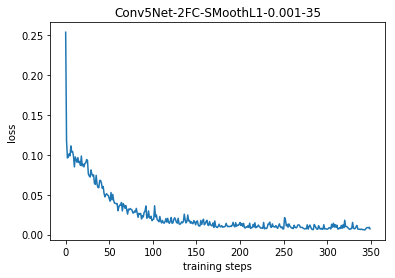

In [25]:
batches_per_epoch = len(train_loader)

# Training loss stored every 10 batches.
batches_stored_per_epoch = int(batches_per_epoch / 10)

avg_training_loss = np.mean(np.array(training_loss[- batches_stored_per_epoch :]))
print('Average Training Loss in last epoch -', avg_training_loss)

# Visualizing the loss over the entire training duration.
title = 'Conv5Net-2FC-SMoothL1-0.001-35'

plt.plot(training_loss)

if (training_loss[0] > 0.5):
    plt.axis([None, None, 0, 0.5])

plt.title(title)
plt.xlabel('training steps')
plt.ylabel('loss')
plt.savefig('analysis/' + title + '.png', bbox_inches='tight')
plt.show()

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [18]:
# Calculate test loss
# iterate through the test dataset
def test_loss():
    
    # Readying the net for evaluation.
    net.eval()
    
    test_loss = 0.
    
    for i, sample in enumerate(test_loader):

        # get sample data: images and ground truth keypoints
        images = sample['image'].type(torch.FloatTensor).to(device)
        key_pts = sample['keypoints'].type(torch.FloatTensor).to(device)
        
        output_pts = net(images)
        loss = criterion(output_pts, key_pts.view(key_pts.shape[0], -1))
        
        test_loss += loss.item()
        
    return test_loss / len(test_loader)

print('Average Test Loss per batch -', test_loss())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Average Test Loss per batch - 0.004787039319053292


In [19]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([32, 1, 224, 224])
torch.Size([32, 68, 2])
torch.Size([32, 68, 2])


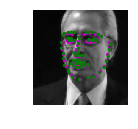

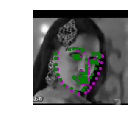

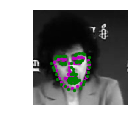

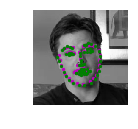

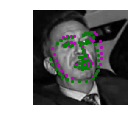

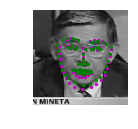

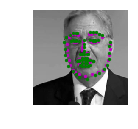

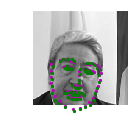

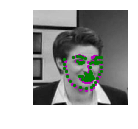

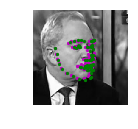

In [20]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [21]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'Conv5Net_0.001_SmoothL1_1.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: <br>**Optimization** - I went with **Adam** over SGD. Adam incorporates properties of both momentum and RMSProp and thus, leads to faster convergence while not getting stuck at local minima. The RMS component in the denominator helps keep the learning rate in check and so, don't need to worry about scheduling learning rate decay.<br>**Loss Function** - As per different docs, the most used loss functions for regression include L1, L2, Root Mean Square Error and Smooth L1 loss. A lot of documents considered Smooth L1 to be the ideal choice as it is combination of L1 and L2 and keeps the value from being too large. However, having never used it before, I tried all 3 with a base architecture (3 conv + pool, 2 fc) and **Smooth L1** seemed to be the better choice - lower and less fluctuating (had plotted the training loss)

Overall, I feel there's further exploring to be done and there could be other choices which may produce better results in general. However, with this being a relatively smaller dataset, these selections seem to be working fine. I would really like to know what you think about the rationale though.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I started off with a basic architecture - 1 Conv layer + 2 FC layer, mostly to verify the code and model parameter dimensions. Once these were verified, I started experimenting with the architecture.
I tried out different loss functions to finally decide upon which one I would use. I incremented the number of convolutional layers and/or fully connected layers when I felt that the loss couldn't be lowered any more and the network was not able to learn all the features. With dropout layers, I was able to avoid overfitting scenarios.
Below, I have listed some of the combinations tried and the training/test loss associated. In the end, I saved the model for the one marked in green. This was a 5 convolutional layer + 2 FC, similar to LeNet but choice of kernel size and number based on VGG.
(Also, there are so many other variations that could've been tried. But ideally an existing architecture should be referred and used. However, I wanted to see how different variations impact the overall result and thus, tried these out.)
<br>
Note - CB(3) - Conv(3x3) + Pool, FC - Fully Conn, FCD - FC with dropout, O - Output
<br>
<table style="width:100%">
  <tr>
    <th>Model_Info</th>
    <th>Epochs</th>
    <th>Loss_Function</th>
    <th>Batch_Training_Loss</th>
    <th>Batch_Test_Loss</th>
  </tr>
  <tr>
    <td>2CB(3)->FCD->O</td>
    <td>35</td>
    <td>MSE</td>
    <td>0.18</td>
    <td>Didn't Check</td>
  </tr>
  <tr>
    <td>2CB(3)->FCD->O</td>
    <td>35</td>
    <td>RMSE</td>
    <td>0.43</td>
    <td>Didn't Check</td>
  </tr>
  <tr>
    <td>3CB(5)->FCD->O</td>
    <td>45</td>
    <td>MSE</td>
    <td>0.051</td>
    <td>Didn't Check</td>
  </tr>
  <tr>
    <td>3CB(5)->FCD->O</td>
    <td>20</td>
    <td>SmoothL1</td>
    <td>0.021</td>
    <td>Didn't Check</td>
  </tr>
  <tr>
    <td>4CB(3)->2FCD->O</td>
    <td>30</td>
    <td>MSE</td>
    <td>0.023</td>
    <td>0.017</td>
  </tr>
  <tr>
    <td>4CB(3)->2FCD->O</td>
    <td>35</td>
    <td>SmoothL1</td>
    <td>0.0082</td>
    <td>0.0069</td>
  </tr>
  <tr>
    <td>4CB(3)->2FCD->O</td>
    <td>40</td>
    <td>SmoothL1</td>
    <td>0.0082</td>
    <td>0.005</td>
  </tr>
  <tr style="color:green">
    <td>5CB(3)->2FCD->O</td>
    <td>35</td>
    <td>SmoothL1</td>
    <td>0.0073</td>
    <td>0.0048</td>
  </tr>
</table>

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: 
<br>**epochs** - For each variation tested, I started off with 20 epochs and observed the plot. If the training loss plot showed that the loss would still continuing decreasing, I would start off training again (on the same weights) for another 10 epochs and would observe the plot. I continued this process and changed the starting count of epochs based on the experience gained. Based on this continuous process, I was able to obtain the best performing models and the epochs at which they did well. Trained it again for the notebook output.
<br>**batch_size** - Initially while trying to train on the CPU itself, I kept a low batch size. Once I enabled GPU, I had the freedom to increase the batch size. I brought it up to 32 and didn't increase it further as I wanted to keep the total number of batches high enough as well to plot the training loss curve better. With a larger dataset, a bigger batch_size would make sense but 32 seemed to work fine for this dataset - both training and plot.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.00759695  0.10283499  0.02124688]
 [-0.0039109   0.05280506 -0.1567474 ]
 [-0.08053491 -0.16128957 -0.18000326]]
(3, 3)


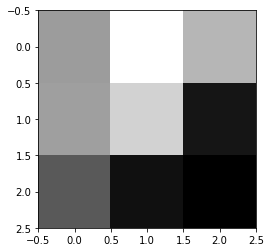

In [23]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.cpu().numpy()

filter_index = 1

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')

## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


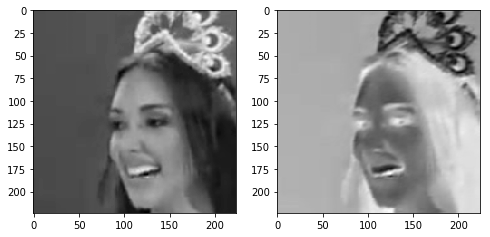

In [24]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

# Importing opencv.
import cv2

test_index = 0

# Getting test image
sample = next(iter(test_loader))
img = (sample['image'][test_index])
img = img.numpy()
img = np.reshape(img, (224, 224))

# Selecting filter.
filter_index = 1
kernel = w[filter_index][0]

filtered_img = cv2.filter2D(img,-1,kernel)

# Printing original and filtered image
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
axes[0].imshow(img, cmap='gray')
axes[1].imshow(filtered_img, cmap='gray')
plt.show()

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: This filter seems to be inverting the pixel intensities in the image - Regions of low intensity converted to high intensity and regions of high intensity converted to low intensity. As the filter mostly tries to subtract intensities, the darker regions (close to 0) have their corresponding normalized value get a high negative value whereas the lighter region (high values) have their values brought close to 0. Thus, considering the absolute values, darker regions have gone from close to 0 to high values (high negative values) and lighter regions have gone from high (positive) to close to 0.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!